In [73]:
import numpy as np
from sklearn.linear_model import ElasticNet

%matplotlib notebook
import matplotlib.pyplot as plt

In [66]:
N = 100
P = 200

# crucial to scale X and y, otherwise solutions are different
X = np.random.normal(size=[N,P])
nz_beta = [1,-2,3,-4,5,-6,7,-8,9,10]
beta = np.array(nz_beta + (P-len(nz_beta))*[0],dtype=np.float64)
sigma = 0.1
y = X @ beta + np.random.normal(scale=sigma, size=N)

In [67]:
y.shape

(100,)

In [85]:
lambda_1 = 2.75
lambda_2 = 0.75

# scikit learn's alpha = glmnet's lambda
alpha = lambda_1 + lambda_2

# scikit learn's l1_ratio = glmnet's alpha
l1_ratio = lambda_1/(lambda_1 + lambda_2)

In [86]:
y_star = np.append(y, np.zeros(P))
X_star = np.vstack( (X, np.sqrt(N*lambda_2)*np.identity(P)) ) 

In [103]:
enet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=False, normalize=False)

In [105]:
enet_fit = enet.fit(X, y)

<IPython.core.display.Javascript object>


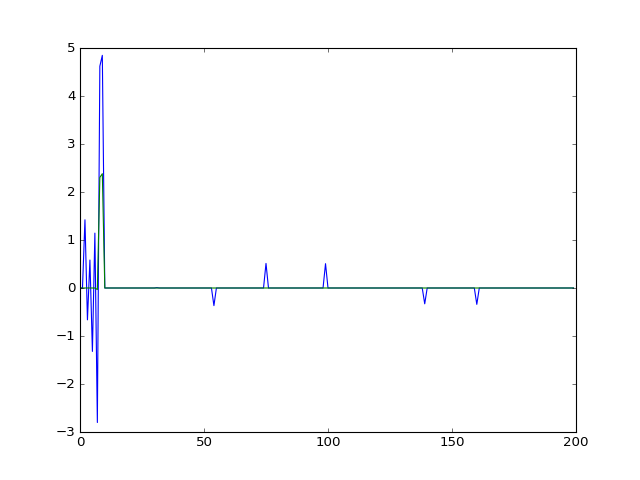

In [106]:
plt.plot(enet_fit.coef_);

In [108]:
lambda_1_aug = lambda_1
lambda_2_aug = 0.0

# scikit learn's alpha = glmnet's lambda
alpha_aug = lambda_1_aug  + lambda_2_aug 

# scikit learn's l1_ratio = glmnet's alpha
l1_ratio_aug = lambda_1_aug/(lambda_1_aug  + lambda_2_aug )

In [109]:
enet_aug = ElasticNet(alpha=alpha_aug, l1_ratio=l1_ratio_aug, fit_intercept=False, normalize=False)

In [110]:
enet_fit_aug = enet_aug.fit(X_star, y_star)

In [111]:
plt.plot(enet_fit_aug.coef_);